In [2]:
from __future__ import division
import numpy as np
import pandas as pd
from skbio.stats.composition import ilr
from skbio import TreeNode
from canvas.phylogeny import phylogenetic_basis
from canvas.viz.ilrtree import balanceplot, balance_test
from biom import load_table

import random
from ete3 import Tree, TreeStyle, faces, AttrFace, BarChartFace
%matplotlib inline

One way to visualize proportions, is to visualize them as logratios of subtrees in a binary tree.

For an example, we suppose that we have the following tree.

In [3]:
tree = TreeNode.read([u"((a,b)f, (c,d)g)r;"])
print(tree.ascii_art())

                    /-a
          /f-------|
         |          \-b
-r-------|
         |          /-c
          \g-------|
                    \-d


In [6]:
table = pd.Series([10, 20, 10, 10],
                  index=['a','b','c','d'])
table

a    10
b    20
c    10
d    10
dtype: int64

In [3]:
table = pd.DataFrame({'a':[10, 10], 'b':[10, 10], 
                      'c':[10, 10], 'd':[20, 40]})
mapping = pd.Series(['Control', 'Treatment'])


In [1]:
tree

NameError: name 'tree' is not defined

In [4]:
def layout(node):
    if node.is_leaf():
        # Add node name to leaf nodes
        N = AttrFace("name", fsize=18, fgcolor='black')
        
        faces.add_face_to_node(N, node, 0)
    if "weight" in node.features:
        # Creates a sphere face whose size is proportional to node's
        # feature "weight"
        C = BarChartFace(values=node.weight, width=20, height=40, 
                         colors=['#FF0000','#0000FF'], min_value=0, max_value=1)
        # Let's make the sphere transparent
        C.opacity = 0.3
        
        # And rotate the face by 90 degrees
        C.rotation = 90
        # And place as a float face over the tree
        faces.add_face_to_node(C, node, 0, position="float")

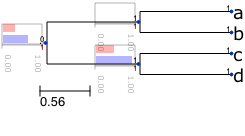

In [13]:
tr.render(file_name='%%inline', tree_style=ts)